# Lean Six Sigma
## Author: Snigdhayan Mahanta

`Lean Six Sigma` is a well established process improvement methodology. Consider a company that manufactures several products at various locations and it is interested in improving the quality (e.g., reducing the number of defects in the manufactured products). There are several `Lean Six Sigma` tools that it can use to visualize and control the process. I created a curated dataset for this purpose and illustrated some of the tools below.

In [1]:
# Load Libraries
library("qcc")
library("plotrix")

Package 'qcc' version 2.7

Type 'citation("qcc")' for citing this R package in publications.



In [2]:
# Create curated manufacting data
n_types = 3 # number of distinct product types
n_obs = 1000 # total number of observations

# Type of the product per observation
productType <- round(sample(1:n_types, n_obs, replace = TRUE))
productType <- paste("P", productType, sep="")

# Number of defects per observation
defects <- round(abs(rnorm(n_obs, mean = 800, sd = 500)))

# Quantity of the product per observation
quantity <- 1000*defects + round(abs(rnorm(n_obs, mean = 50000, sd = 100000)))

# Manufacturing location per observation
location <- sample(c("Germany", "France", "Spain", "Italy"), n_obs, replace = TRUE, prob = c(0.3, 0.4, 0.2, 0.1))

# Dataframe of manufacturing data
df <- data.frame("ProductType" = productType, "Quantity" = quantity, "Defects" = defects, "Location" = location)

# Ratio of defects to quantity
df <- within(df, DefectRatio <- df$Defects/df$Quantity)

In [3]:
# Generate a sample and visualize it
sample_size <- 100
myData <- df[sample(nrow(df), sample_size), ]
head(myData, 10)

,ProductType,Quantity,Defects,Location,DefectRatio
,<fct>,<dbl>,<dbl>,<fct>,<dbl>
195,P2,1666779,1571,France,0.0009425365
73,P1,57922,43,Germany,0.0007423777
20,P3,1186439,1150,Germany,0.0009692871
663,P2,610702,559,Germany,0.0009153401
273,P1,67329,29,Germany,0.0004307208
972,P1,650769,449,Germany,0.0006899530
50,P3,653890,541,Spain,0.0008273563
351,P1,446861,333,France,0.0007451982
94,P1,833593,803,Spain,0.0009632998


         
Pareto chart analysis for ratio
             Frequency    Cum.Freq.   Percentage Cum.Percent.
  Italy   8.981494e-04 8.981494e-04 2.588679e+01 2.588679e+01
  Spain   8.777017e-04 1.775851e-03 2.529744e+01 5.118422e+01
  France  8.744553e-04 2.650306e-03 2.520387e+01 7.638809e+01
  Germany 8.192219e-04 3.469528e-03 2.361191e+01 1.000000e+02

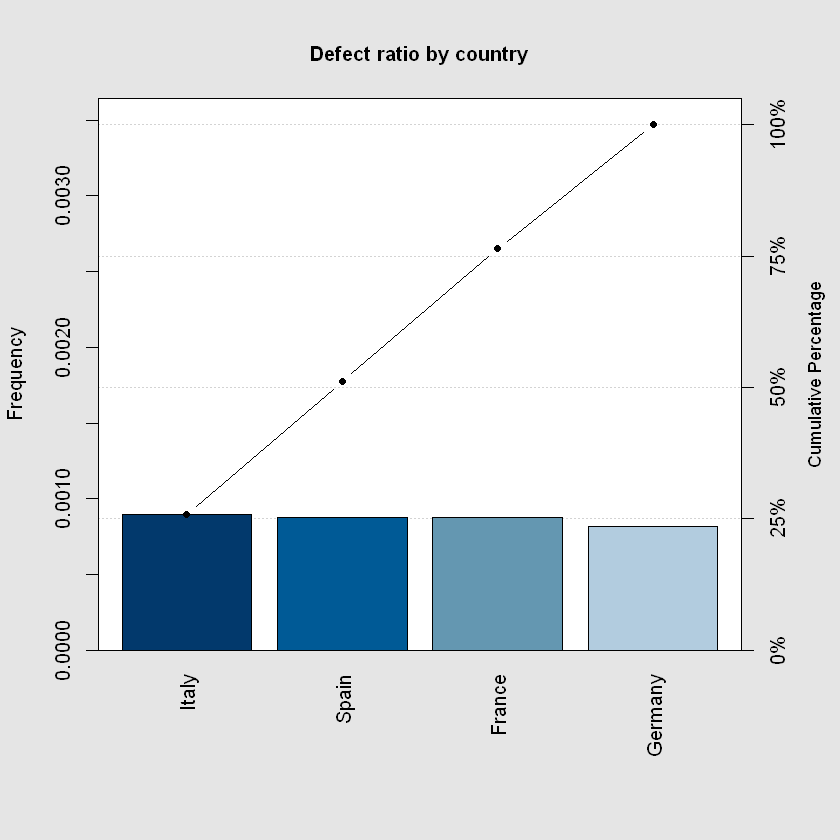

In [4]:
# Pareto chart
aggregatedData <- aggregate(myData$DefectRatio, by=list(Location=myData$Location), FUN=mean)
names(aggregatedData)[2] <- "DefectRatio"
ratio <- aggregatedData$DefectRatio
names(ratio) <- aggregatedData$Location
pareto.chart(ratio, main="Defect ratio by country")

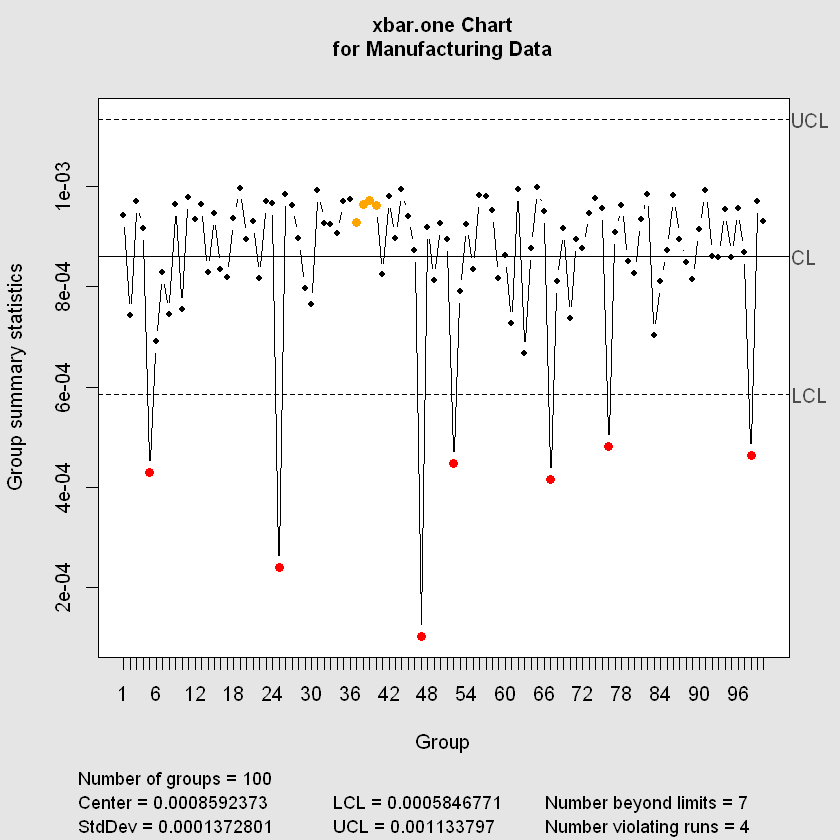

In [5]:
# Create QCC object for dataset and plot control chart 
xbar = qcc(myData$DefectRatio, data.name="Manufacturing Data", type="xbar.one", nsigmas=2)


Process Capability Analysis

Call:
process.capability(object = xbar, spec.limits = c(6e-04, 0.001),     breaks = 20)

Number of obs = 100          Target = 0.0008
       Center = 0.0008592       LSL = 0.0006
       StdDev = 0.0001373       USL = 0.001

Capability indices:

       Value    2.5%   97.5%
Cp    0.7284  0.6271  0.8296
Cp_l  0.9442  0.8210  1.0674
Cp_u  0.5127  0.4315  0.5939
Cp_k  0.5127  0.4159  0.6095
Cpm   0.6688  0.5692  0.7683

Exp<LSL 2.9%	 Obs<LSL 7%
Exp>USL 15%	 Obs>USL 0%


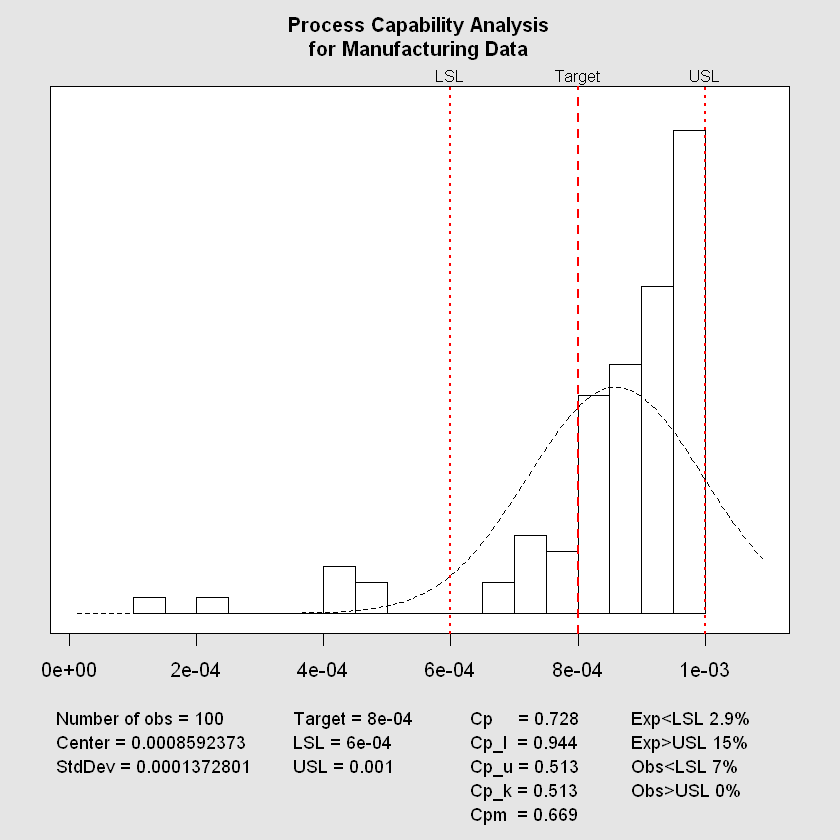

In [6]:
# Capability Analysis
process.capability(xbar, spec.limits=c(0.0006, 0.0010), breaks=20,)

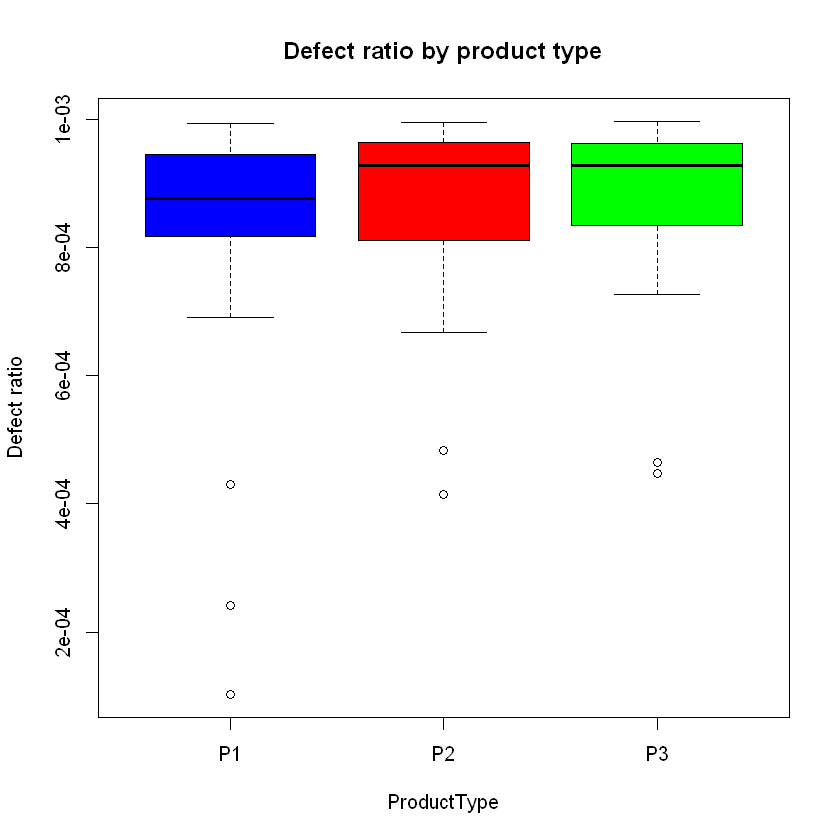

In [7]:
# Boxplot of defect ratio by product type
boxplot(data=myData, DefectRatio ~ ProductType, 
        col = c("blue", "red", "green"),
        ylab = "Defect ratio",
        main = "Defect ratio by product type")

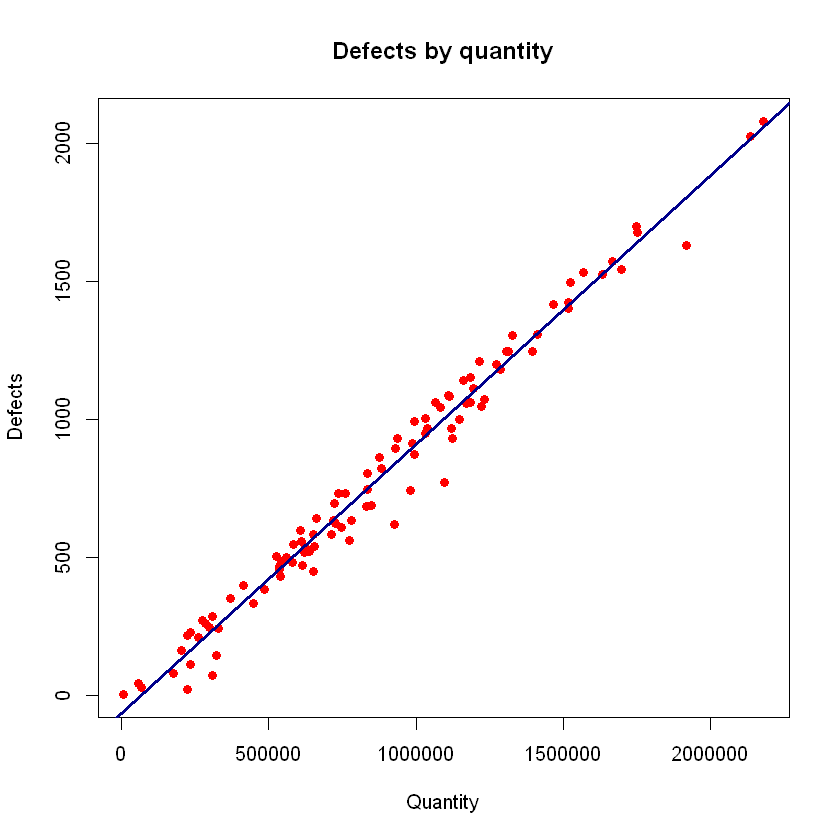

In [8]:
# Scatteroplot of defects by quantity
y = myData$Defects
x = myData$Quantity
plot(x, y,
     type ="p", #point
     col = "red",
     main = "Defects by quantity", 
     xlab = "Quantity",
     ylab = "Defects",
     pch = 16 # Set Visual Appearance of Datapoints
)

# Add best fit line to plot
linear_mod = (lm(y ~ x))
abline(linear_mod, col="darkblue", lwd=3)

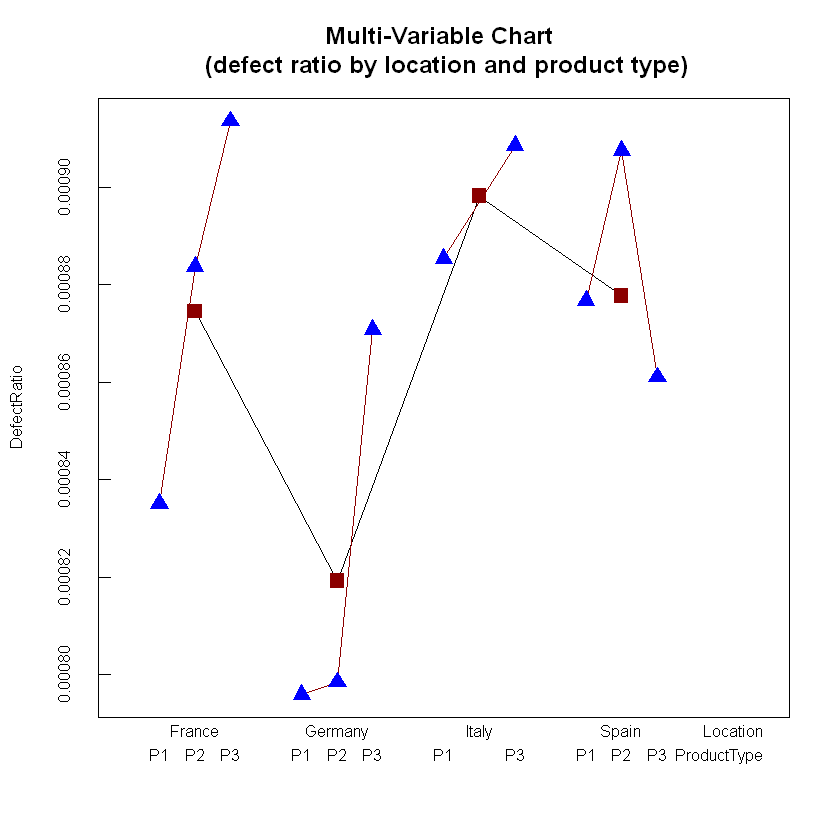

In [9]:
# Multivari chart of defect ratio by location and product type
multivari("DefectRatio",                      # Response 
          "Location", "ProductType",          # Factors  
          data = myData,                      # Data 
          col = list("darkred", "blue"),
          pch = list(15, 17), 
          xlab.depth = 2,
          legend = FALSE,
          cex = 0.8,
          main = "Multi-Variable Chart \n (defect ratio by location and product type)",
          )

In [10]:
# Analysis of variance (ANOVA)
res.aov <- aov(Defects ~ Location, data = myData)
# Summary of the analysis
summaryAnova <- summary(res.aov)
summaryAnova

            Df   Sum Sq Mean Sq F value Pr(>F)
Location     3  1329615  443205   2.084  0.107
Residuals   96 20413651  212642               

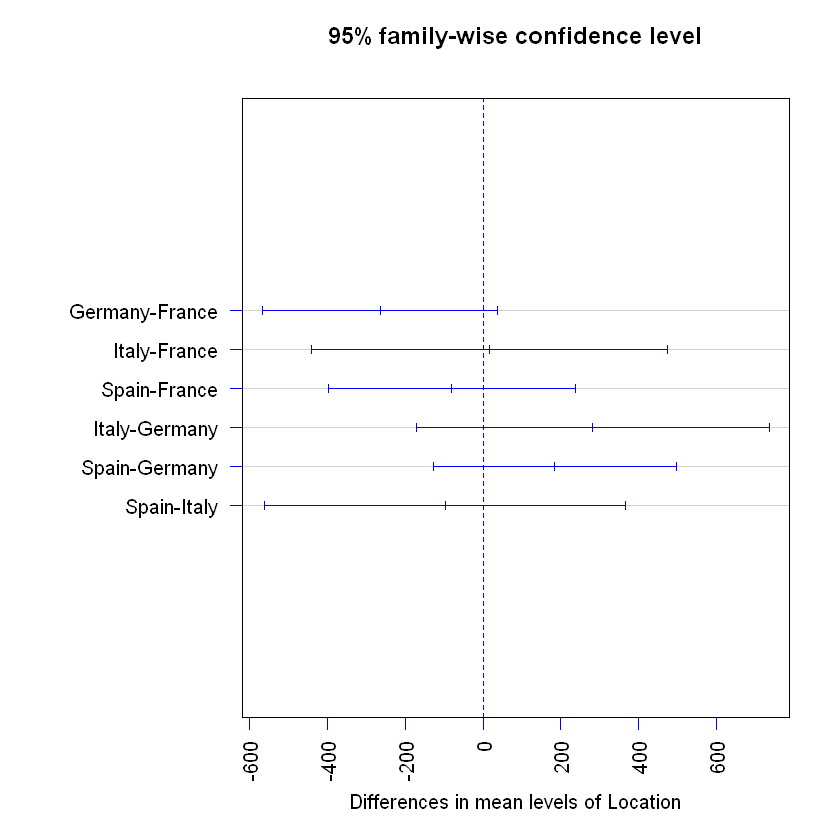

In [11]:
# Tukey test to differentiate the means
TukeyTest <- TukeyHSD(res.aov)
par(mar=c(5.1, 10.1, 4.1, 2.1), mgp=c(3, 1, 0), las=2)
plot(TukeyTest, asp = 100, col = "blue") # ascertain the significance of the differences between the observed means
# TukeyTest